In [1]:
import torch 
from torch import nn
from torch.utils.data import DataLoader, Dataset
import json, re, glob,random
import matplotlib.pyplot as plt
import numpy as np

In [15]:
#  define the colors from colorbrewer2
orange1 = '#feedde'
orange2 = '#fdbe85'
orange3 = '#fd8d3c'
orange4 = '#e6550d'
orange5 = '#a63603'
blue1 = '#eff3ff'
blue2 = '#bdd7e7'
blue3 = '#6baed6'
blue4 = '#3182bd'
blue5 = '#08519c'
green1 = '#edf8e9'
green2 = '#bae4b3'
green3 = '#74c476'
green4 = '#31a354'
green5 = '#006d2c'
grey1 = '#f7f7f7'
grey2 = '#cccccc'
grey3 = '#969696'
grey4 = '#636363'
grey5 = '#252525'
purple1 = '#f2f0f7'
purple2 = '#cbc9e2'
purple3 = '#9e9ac8'
purple4 = '#756bb1'
purple5 = '#54278f'
red1 = '#fee5d9'
red2 = '#fcae91'
red3 = '#fb6a4a'
red4 = '#de2d26'
red5 = '#a50f15'


# Observed clone size vectors

In [13]:
mapping_ID_to_cell_output = {}
mapping_ID_to_cell_output['7322'] = 680+50+0+8+160+50
mapping_ID_to_cell_output['25568'] = 537+5+159+0
mapping_ID_to_cell_output['7328'] = 43+120+36+67+363
mapping_ID_to_cell_output['27510'] = 5+6+33
mapping_ID_to_cell_output['2261'] = 21+0+15+3
mapping_ID_to_cell_output['47668'] = 6+4

mapping_ID_to_cell_output['2225'] = 158+38+119+7
mapping_ID_to_cell_output['32963'] = 9+81+185
mapping_ID_to_cell_output['27491'] = 28+20+0+10+5
mapping_ID_to_cell_output['4334'] = 25
mapping_ID_to_cell_output['12565b'] = 13+3
mapping_ID_to_cell_output['26833R'] = 5

In [ ]:
# import pandas as pd

# # Create an empty DataFrame
# df = pd.DataFrame(columns=['$n_0$','$n_1$','$n_2$','$n_3$','total_n', 'k', 'sample_label'])

# # Append rows one by one
# df = df.append({'$n_0$': 680, '$n_1$':  50, '$n_2$':  0,'$n_3$':8,'total_n':680+50+0+8+160+50,'k':4,'sample_label':'7322'}, ignore_index=True)
# df = df.append({'$n_0$': 537, '$n_1$':  5, '$n_2$':  159,'$n_3$':0,'total_n':537+5+159+0,'k':4,'sample_label':'25568R'}, ignore_index=True)
# df = df.append({'$n_0$': 0, '$n_1$':  0, '$n_2$':  43,'$n_3$':120,'total_n':43+120+36+67+363,'k':4,'sample_label':'7328'}, ignore_index=True)
# df = df.append({'$n_0$': 5, '$n_1$':  0, '$n_2$':  0,'$n_3$':6,'total_n':5+6+33,'k':4,'sample_label':'27510'}, ignore_index=True)
# df = df.append({'$n_0$': 21, '$n_1$':  0, '$n_2$':  15,'$n_3$':3,'total_n':21+0+15+3,'k':4,'sample_label':'2261'}, ignore_index=True)
# df = df.append({'$n_0$': 6, '$n_1$':  0, '$n_2$':  4,'$n_3$':0,'total_n':6+0+4,'k':4,'sample_label':'47668'}, ignore_index=True)


# df = df.append({'$n_0$': 158, '$n_1$':  38, '$n_2$':  119,'$n_3$':'NaN', 'total_n':158+38+119+7, 'k':3,'sample_label':'2225'}, ignore_index=True)
# df = df.append({'$n_0$': 28, '$n_1$':  20, '$n_2$':  0,'$n_3$':'NaN','total_n':28+20+0+10+5,'k':3,'sample_label':'27491'}, ignore_index=True)
# df = df.append({'$n_0$': 0, '$n_1$':  0, '$n_2$':  0,'$n_3$':'NaN','total_n':25,'k':3,'sample_label': '4334'}, ignore_index=True)
# df = df.append({'$n_0$': 2, '$n_1$':  0, '$n_2$':  3,'$n_3$':'NaN','total_n':5,'k':3,'sample_label':'26833R'}, ignore_index=True)
# df = df.append({'$n_0$': 13, '$n_1$':  3, '$n_2$':  1,'$n_3$':'NaN','total_n':13+3+1,'k':3,'sample_label':'12565b'}, ignore_index=True)
# df = df.append({'$n_0$': 285, '$n_1$':  0, '$n_2$':  13,'$n_3$':'NaN','total_n':285+13,'k':3,'sample_label':'12565a_v1'}, ignore_index=True)
# df = df.append({'$n_0$': 285, '$n_1$':  13, '$n_2$':  0,'$n_3$':'NaN','total_n':285+13,'k':3,'sample_label':'12565a_v2'}, ignore_index=True)



# # df.to_csv('dataframes_for_distance_metrics/Poon_unambiguous_cases_clone_size_vectors.csv', sep=',', index=False, encoding='utf-8')

In [14]:

def convert_format_Poon(x, total_cell_num, n):
    print('total_cell_num', total_cell_num, 'best n', n)
    x = [c*n/total_cell_num for c in x]
    y = []
    for i in range(16):
        y.append(x)
    converted_x = torch.tensor(y) 
    
    return converted_x

def convert_format(x, total_cell_num, n):
    if sum(x) != 0:
        y = [c/sum(x) for c in x]
    else:
        y = None
    return y

# 4-hit
tree_7322 = convert_format([float(680), float(50), float(0), float(8)], 680+50+0+8+160+50, 1000)
tree_25568 = convert_format([float(537), float(5), float(159), float(0)], 537+5+159+0, 1000)
tree_7328 = convert_format([float(0), float(0), float(43), float(120)], 43+120+36+67+363, 1000)
tree_27510 = convert_format([float(5), float(0), float(0), float(6)], 5+6+33, 30) #changed on 16102023
tree_2261 = convert_format([float(21), float(0), float(15), float(3)], 21+0+15+3, 30)
tree_47668 = convert_format([float(6), float(0), float(4), float(0)], 6+0+4, 10)

# 3-hit
tree_32963 = convert_format([float(9), float(81), float(185)], 9+81+185, 300)
tree_2225 = convert_format([float(158), float(38), float(119)], 158+38+119+7, 300)
tree_27491 = convert_format([float(28), float(20), float(0)], 28+20+0+10+5, 100) #changed on 16102023: (normalization can be -5 )there are two versions
tree_4334 = convert_format([float(0), float(0), float(0)], 25, 30)
tree_12565b= convert_format([float(13), float(3),  float(0)], 13+3, 10)
tree_26833R = convert_format([float(2), float(0), float(3)], 5, 10)
tree_12565a_v1= convert_format([float(285), float(0),  float(13)], 285+13, 300)
tree_12565a_v2= convert_format([float(285), float(13),  float(0)], 285+13, 300)

all_trees=[tree_7322, tree_25568, tree_7328, tree_27510, tree_2261, tree_47668,tree_2225, tree_32963, tree_27491, tree_12565b, tree_26833R]



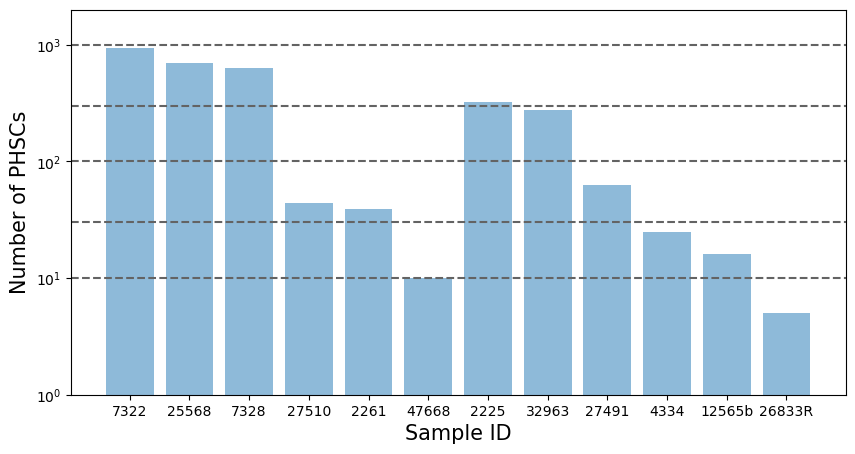

In [17]:
plt.clf()
plt.close('all')
f, ax1 = plt.subplots(1,1, figsize=(10,5))

sample_ID = mapping_ID_to_cell_output.keys()
actual_cell_number = mapping_ID_to_cell_output.values()
log_cell_number = []
for num in actual_cell_number:
    log_cell_number.append(np.log(num))
plt.bar(sample_ID, log_cell_number, align='center', alpha=0.5)
# plt.plot(loss_trajectory,  label = seed)

    
# plt.title('PHSC output')
plt.ylabel('Number of PHSCs', fontsize = 15)# plt.xlim(-3000, 110000)
plt.xlabel('Sample ID', fontsize = 15)
# plt.ylabel('test accuracy', fontsize = 15)
plt.ylim(np.log(1), np.log(2000))
plt.yticks([np.log(1), np.log(10), np.log(100), np.log(1000)],['$10^{0}$','$10^{1}$','$10^{2}$','$10^{3}$'])
# plt.ylabel('loss', fontsize = 15)
plt.axhline(y=np.log(1000), linestyle = '--', color = grey4)
plt.axhline(y=np.log(300), linestyle = '--', color = grey4)
plt.axhline(y=np.log(100), linestyle = '--', color = grey4)
plt.axhline(y=np.log(30), linestyle = '--', color = grey4)
plt.axhline(y=np.log(10), linestyle = '--', color = grey4)
# plt.spines['top'].set_visible(False)
# plt.legend(frameon = 0, fontsize=10)
# plt.savefig('PHSC_output.pdf', bbox_inches = 'tight')



# Define model

In [153]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(3, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 9),
        )
        
        def init_weights(m):
            if isinstance(m, nn.Linear):
#                 torch.nn.init.xavier_uniform_(m.weight)
                torch.nn.init.kaiming_uniform_(m.weight)

#                 n = m.in_features
#                 y = 1.0/np.sqrt(n)
#                 m.weight.data.uniform_(-y, y)
#                 m.bias.data.fill_(0)
                
#                 m.weight.data.normal_(0.0,y)
                
        self.linear_relu_stack.apply(init_weights)

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
    
    

In [1]:
# # import 10 different model chosen based on k and n of observed tree

# imported_model_1 = NeuralNetwork()
# imported_model_1.load_state_dict(torch.load('stored_threehit_models/subsample30models/model_randomseed_71_data_epoch_20000.pt'))
# imported_model_1.eval()

# imported_model_2 = NeuralNetwork()
# imported_model_2.load_state_dict(torch.load('stored_threehit_models/subsample30models/model_randomseed_72_data_epoch_20000.pt'))
# imported_model_2.eval()

# imported_model_3 = NeuralNetwork()
# imported_model_3.load_state_dict(torch.load('stored_threehit_models/subsample30models/model_randomseed_73_data_epoch_20000.pt'))
# imported_model_3.eval()

# imported_model_4 = NeuralNetwork()
# imported_model_4.load_state_dict(torch.load('stored_threehit_models/subsample30models/model_randomseed_74_data_epoch_20000.pt'))
# imported_model_4.eval()

# imported_model_5 = NeuralNetwork()
# imported_model_5.load_state_dict(torch.load('stored_threehit_models/subsample30models/model_randomseed_75_data_epoch_20000.pt'))
# imported_model_5.eval()

# imported_model_6 = NeuralNetwork()
# imported_model_6.load_state_dict(torch.load('stored_threehit_models/subsample30models/model_randomseed_76_data_epoch_20000.pt'))
# imported_model_6.eval()

# imported_model_7 = NeuralNetwork()
# imported_model_7.load_state_dict(torch.load('stored_threehit_models/subsample30models/model_randomseed_77_data_epoch_20000.pt'))
# imported_model_7.eval()

# imported_model_8 = NeuralNetwork()
# imported_model_8.load_state_dict(torch.load('stored_threehit_models/subsample30models/model_randomseed_78_data_epoch_20000.pt'))
# imported_model_8.eval()

# imported_model_9 = NeuralNetwork()
# imported_model_9.load_state_dict(torch.load('stored_threehit_models/subsample30models/model_randomseed_79_data_epoch_20000.pt'))
# imported_model_9.eval()

# imported_model_10 = NeuralNetwork()
# imported_model_10.load_state_dict(torch.load('stored_threehit_models/subsample30models/model_randomseed_80_data_epoch_20000.pt'))
# imported_model_10.eval()

In [162]:
import seaborn as sns
from statistics import mode

def predicting_real_tree_params(real_tree):
    
    correct = 0
    predicted_class_list = {}
    actual_class_list = {}
    with torch.no_grad():
        
        predicted_class_list = []
        pred = imported_model_1(real_tree)
        predicted_class_1 = int(pred.argmax(1)[0])
        predicted_class_list.append(predicted_class_1)
            
        def evaluating_with_one_more_model(model):
            
            pred = model(real_tree)
            predicted_class = int(pred.argmax(1)[0])
            predicted_class_list.append(predicted_class)
                
            return predicted_class_list
        
        evaluating_with_one_more_model(imported_model_2)
        evaluating_with_one_more_model(imported_model_3)
        evaluating_with_one_more_model(imported_model_4)
        evaluating_with_one_more_model(imported_model_5)
        evaluating_with_one_more_model(imported_model_6)
        evaluating_with_one_more_model(imported_model_7)
        evaluating_with_one_more_model(imported_model_8)
        evaluating_with_one_more_model(imported_model_9)
        evaluating_with_one_more_model(imported_model_10)
                 
        consensus_prediction=mode(predicted_class_list)

    print('predicted_class_list', predicted_class_list)
    
    return predicted_class_list, consensus_prediction


def output(predicted_class_list_dict, title):

    predicted_class_list = predicted_class_list_dict
    
    
    output_matrix = [[0,0,0],[0,0,0], [0,0,0]]
    number_of_test_data_versions = len(predicted_class_list)
    for predicted_class in predicted_class_list:
        column = predicted_class % 3
        if 6>predicted_class >= 3:
            row = 1
        else:
            if predicted_class >= 6:
                row = 2
            else:
                row = 0
        output_matrix[row][column]+=1

    categories_x = ['neutral','moderate', 'very \nstrong']
    categories_x = ['weak','moderate', 'strong']
    categories_y = ['high', 'medium', 'low']

    plt.rcParams["figure.figsize"] = [7.50, 3.50]
    plt.rcParams["figure.autolayout"] = True
    fig, ax2 = plt.subplots(ncols=1, figsize=(5,5))
    fig.subplots_adjust(wspace=0.01)

#     sns.heatmap(input_matrix, annot=False, ax=ax1, fmt='.2%', cmap='Blues', cbar=False, vmin=0, vmax=1)
#     ax1.set_xticklabels(categories_x, fontsize=20)
#     ax1.set_yticklabels(categories_y, fontsize=20)
#     ax1.set_xlabel('$s$', fontsize = 20)
    
    
    sns.heatmap(output_matrix, annot=False,  fmt='.2%', cmap='BuPu', cbar=False, \
                vmin = 0, vmax = number_of_test_data_versions)
    
    ax2.set_xticklabels(categories_x, fontsize=20)
    ax2.set_yticklabels(categories_y, fontsize=20)
    ax2.set_xlabel('$s$', fontsize = 20)
    ax2.set_ylabel('$\mu$', fontsize = 20)
    # cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = np.array(confusion_matrix), display_labels = [False, True])

#     cm_display.plot()
    plt.savefig('MLoutput_14122023/Tree_'+str(title)+'_k3n300_classifier.pdf', bbox_inches = 'tight')


    plt.show()

predicted_class_list [2, 2, 2, 1, 2, 2, 3, 1, 2, 2]


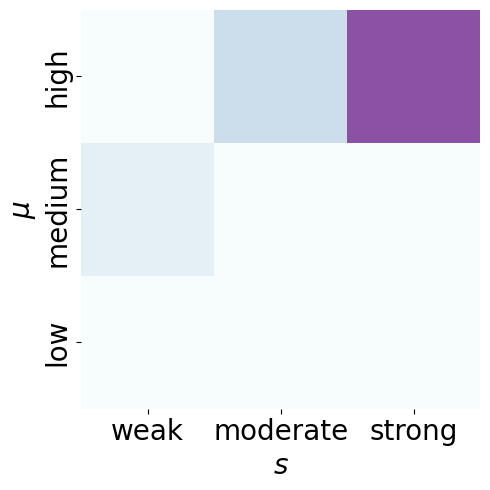

In [164]:
predicted_class_list, consensus_prediction = predicting_real_tree_params(tree_12565a_v2)

output(predicted_class_list, '12565a_v2')

In [124]:
# threehit_master_list = [7, 4, 4, 7, 7, 7, 7, 7, 7, 4] + [4, 1, 1, 1, 1, 1, 4, 1, 1, 1] + [5, 0, 5, 5, 4, 5, 7, 5, 2, 2]+[2, 4, 4, 1, 2, 1, 1, 2, 1, 5]+[7, 7, 8, 8, 5, 8, 5, 5, 7, 2]
# fourhit_master_list = [1, 4, 1, 0, 5, 1, 5, 4, 4, 4] + [0, 0, 4, 4, 0, 1, 4, 1, 4, 0] + [5, 5, 5, 2, 4, 5, 5, 5, 5, 4]+[2, 4, 5, 4, 2, 0, 5, 3, 0, 1]+[5, 4, 0, 4, 4, 5, 3, 4, 0, 5]+[1, 4, 5, 4, 0, 0, 4, 2, 5, 4]



In [127]:
import seaborn as sns
from statistics import mode

def outputtotal(predicted_class_list_dict, title):

    predicted_class_list = predicted_class_list_dict
    print('predicted_class_list', predicted_class_list)
    
    output_matrix = [[0,0,0],[0,0,0], [0,0,0]]
    number_of_test_data_versions = len(predicted_class_list)
    for predicted_class in predicted_class_list:
        column = predicted_class % 3
        if 6>predicted_class >= 3:
            row = 1
        else:
            if predicted_class >= 6:
                row = 2
            else:
                row = 0
        output_matrix[row][column]+=1

    categories_x = ['neutral','moderate', 'very \nstrong']
    categories_y = ['high', 'medium', 'low']

    plt.rcParams["figure.figsize"] = [7.50, 3.50]
    plt.rcParams["figure.autolayout"] = True
    fig, ax2 = plt.subplots(ncols=1, figsize=(5,5))
    fig.subplots_adjust(wspace=0.01)

#     sns.heatmap(input_matrix, annot=False, ax=ax1, fmt='.2%', cmap='Blues', cbar=False, vmin=0, vmax=1)
#     ax1.set_xticklabels(categories_x, fontsize=20)
#     ax1.set_yticklabels(categories_y, fontsize=20)
#     ax1.set_xlabel('$s$', fontsize = 20)
    
    
    sns.heatmap(output_matrix, annot=False,  fmt='.2%', cmap='BuPu', cbar=False, \
                vmin = 0, vmax = number_of_test_data_versions)
    
    ax2.set_xticklabels(categories_x, fontsize=20)
    ax2.set_yticklabels(categories_y, fontsize=20)
    ax2.set_xlabel('$s$', fontsize = 20)
    ax2.set_ylabel('$\mu$', fontsize = 20)
    # cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = np.array(confusion_matrix), display_labels = [False, True])

#     cm_display.plot()
#     plt.savefig('stored_fourhit_models_inc_neutrality/graphs/Summary_4hits.pdf', bbox_inches = 'tight')
#     plt.savefig('MLoutput_14122023/Summary_of_fourhit.pdf', bbox_inches = 'tight')
# 

    plt.show()

predicted_class_list [1, 4, 1, 0, 5, 1, 5, 4, 4, 4, 0, 0, 4, 4, 0, 1, 4, 1, 4, 0, 5, 5, 5, 2, 4, 5, 5, 5, 5, 4, 2, 4, 5, 4, 2, 0, 5, 3, 0, 1, 5, 4, 0, 4, 4, 5, 3, 4, 0, 5, 1, 4, 5, 4, 0, 0, 4, 2, 5, 4]


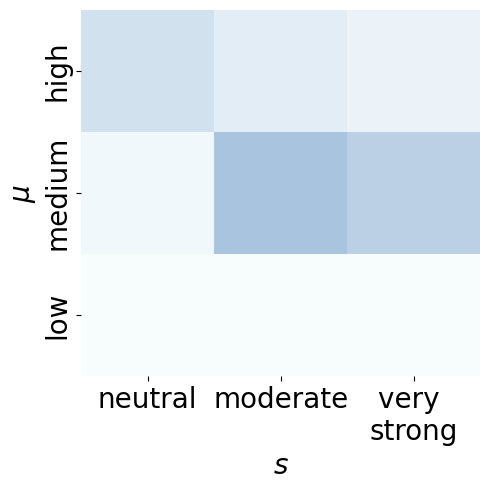

In [126]:
outputtotal(fourhit_master_list, 1)

# Dropout rates

In [71]:
# DO_25568R = 0.157
# DO_27510 = 0.1535
# DO_26833R = 0.136
# DO_2239 = 0.259
# DO_27491 = 0.067
# DO_47668= 0.226
# # DO_7313 = 0.188
# DO_4334 = 0.082
# DO_2261 = 0.1225

# DO_32747 = 0.121
# DO_7328 = 0.09
# DO_32963 = 0.137
# DO_6374 = 0.096
# DO_41095 = 0.178
# DO_2225 = 0.157
# DO_12565a = 0.143


# DO_12565b= 'NA'
# DO_7322= 'NA'

# Convergence of accuracy

In [15]:
def read_accuracy(filename):
    print("Started reading")
    with open(filename, "rb") as fp:
        accuracy_trajectory = json.load(fp)
#         print("Done writing JSON data into .json file")
        
    return accuracy_trajectory

Started reading
Started reading
Started reading


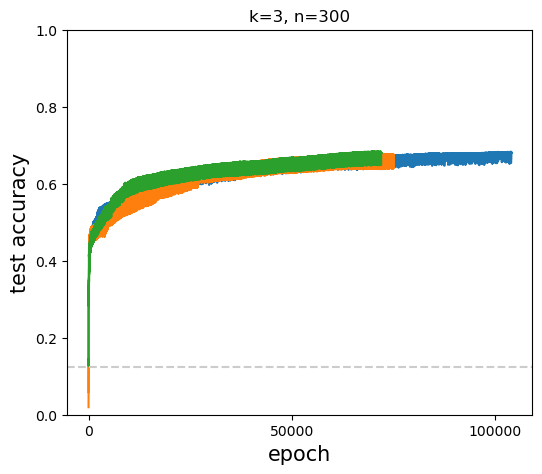

In [26]:
import glob as glob
plt.clf()
plt.close('all')
f, ax1 = plt.subplots(1,1, figsize=(6,5))

list_of_filenames= glob.glob('Selected_models//k3_n300//training_loss//testing_accuracy*')
list_of_training_filenames=glob.glob('Selected_models//k3_n300//training_loss//training_accuracy*')
list_of_seeds = range(len(list_of_training_filenames))

# for filename, seed in zip(list_of_training_filenames, list_of_seeds):
#     accuracy_trajectory = read_accuracy(filename)
#     plt.plot(accuracy_trajectory, color = grey2) 
for filename, seed in zip(list_of_filenames, list_of_seeds):
    accuracy_trajectory = read_accuracy(filename)
    plt.plot(accuracy_trajectory, label = 'seed'+str(seed))
# plt.plot(loss_trajectory,  label = seed)

    
plt.title('k=3, n=300')
# plt.xlim(-3000, 110000)
plt.xlabel('epoch', fontsize = 15)
plt.ylabel('test accuracy', fontsize = 15)
plt.ylim(0, 1.0)
plt.xticks([0,50000,100000])
# plt.xticklabels([0,50000,100000])
# plt.ylabel('loss', fontsize = 15)
# plt.axhline(y=0.52, linestyle = '--', color = grey4)
plt.axhline(y=1/8, linestyle = '--', color = grey2)

# plt.spines['top'].set_visible(False)
# plt.legend(frameon = 0, fontsize=10)

# plt.savefig('Selected_models/plot_k3_n300.pdf', bbox_inches = 'tight')



# Trained models

Below is the list of trained neural networks used for the corresponding k and n.

k=4, n=1000

In [ ]:
list_of_filenames=[
    "stored_fourhit_models_inc_neutrality/three_seed_test/subsample1000models/testing_accuracy_three_seed_test_initialization_a.json",
    "stored_fourhit_models_inc_neutrality/three_seed_test/subsample1000models/testing_accuracy_three_seed_test_initialization_b.json",
    "stored_fourhit_models_inc_neutrality/three_seed_test/subsample1000models/testing_accuracy_three_seed_test_initialization_c.json"]


In [49]:
# imported_model_1 = NeuralNetwork()
# imported_model_1.load_state_dict(torch.load('stored_fourhit_models_inc_neutrality/three_seed_test/subsample1000models/model_three_seed_test_initialization_a_data_150000.pt'))
# imported_model_1.eval()

# imported_model_2 = NeuralNetwork()
# imported_model_2.load_state_dict(torch.load('stored_fourhit_models_inc_neutrality/three_seed_test/subsample1000models/model_three_seed_test_initialization_b_data_150000.pt'))
# imported_model_2.eval()

# imported_model_3 = NeuralNetwork()
# imported_model_3.load_state_dict(torch.load('stored_fourhit_models_inc_neutrality/three_seed_test/subsample1000models/model_three_seed_test_initialization_c_data_150000.pt'))
# imported_model_3.eval()

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=4, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=256, bias=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=128, bias=True)
    (7): ReLU()
    (8): Linear(in_features=128, out_features=6, bias=True)
  )
)

In [128]:
# import 10 different model

imported_model_1 = NeuralNetwork()
imported_model_1.load_state_dict(torch.load('stored_fourhit_models_inc_neutrality/subsample1000models/model_with_sb_randomseed_1_data_epoch_10000.pt'))
imported_model_1.eval()

imported_model_2 = NeuralNetwork()
imported_model_2.load_state_dict(torch.load('stored_fourhit_models_inc_neutrality/subsample1000models/model_with_sb_randomseed_2_data_epoch_10000.pt'))
imported_model_2.eval()

imported_model_3 = NeuralNetwork()
imported_model_3.load_state_dict(torch.load('stored_fourhit_models_inc_neutrality/subsample1000models/model_with_sb_randomseed_3_data_epoch_10000.pt'))
imported_model_3.eval()

imported_model_4 = NeuralNetwork()
imported_model_4.load_state_dict(torch.load('stored_fourhit_models_inc_neutrality/subsample1000models/model_with_sb_randomseed_4_data_epoch_10000.pt'))
imported_model_4.eval()

imported_model_5 = NeuralNetwork()
imported_model_5.load_state_dict(torch.load('stored_fourhit_models_inc_neutrality/subsample1000models/model_with_sb_randomseed_5_data_epoch_10000.pt'))
imported_model_5.eval()

imported_model_6 = NeuralNetwork()
imported_model_6.load_state_dict(torch.load('stored_fourhit_models_inc_neutrality/subsample1000models/model_with_sb_randomseed_6_data_epoch_10000.pt'))
imported_model_6.eval()

imported_model_7 = NeuralNetwork()
imported_model_7.load_state_dict(torch.load('stored_fourhit_models_inc_neutrality/subsample1000models/model_with_sb_randomseed_7_data_epoch_10000.pt'))
imported_model_7.eval()

imported_model_8 = NeuralNetwork()
imported_model_8.load_state_dict(torch.load('stored_fourhit_models_inc_neutrality/subsample1000models/model_with_sb_randomseed_8_data_epoch_10000.pt'))
imported_model_8.eval()

imported_model_9 = NeuralNetwork()
imported_model_9.load_state_dict(torch.load('stored_fourhit_models_inc_neutrality/subsample1000models/model_with_sb_randomseed_9_data_epoch_10000.pt'))
imported_model_9.eval()

imported_model_10 = NeuralNetwork()
imported_model_10.load_state_dict(torch.load('stored_fourhit_models_inc_neutrality/subsample1000models/model_with_sb_randomseed_10_data_epoch_10000.pt'))
imported_model_10.eval()


NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=4, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=256, bias=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=128, bias=True)
    (7): ReLU()
    (8): Linear(in_features=128, out_features=6, bias=True)
  )
)

k=4, n=300

In [136]:
# import 10 different model

imported_model_1 = NeuralNetwork()
imported_model_1.load_state_dict(torch.load('stored_fourhit_models_inc_neutrality/subsample300models/model_with_sb_randomseed_11_data_epoch_10000.pt'))
imported_model_1.eval()

imported_model_2 = NeuralNetwork()
imported_model_2.load_state_dict(torch.load('stored_fourhit_models_inc_neutrality/subsample300models/model_with_sb_randomseed_12_data_epoch_10000.pt'))
imported_model_2.eval()

imported_model_3 = NeuralNetwork()
imported_model_3.load_state_dict(torch.load('stored_fourhit_models_inc_neutrality/subsample300models/model_with_sb_randomseed_13_data_epoch_10000.pt'))
imported_model_3.eval()

imported_model_4 = NeuralNetwork()
imported_model_4.load_state_dict(torch.load('stored_fourhit_models_inc_neutrality/subsample300models/model_with_sb_randomseed_14_data_epoch_10000.pt'))
imported_model_4.eval()

imported_model_5 = NeuralNetwork()
imported_model_5.load_state_dict(torch.load('stored_fourhit_models_inc_neutrality/subsample300models/model_with_sb_randomseed_15_data_epoch_10000.pt'))
imported_model_5.eval()

imported_model_6 = NeuralNetwork()
imported_model_6.load_state_dict(torch.load('stored_fourhit_models_inc_neutrality/subsample300models/model_with_sb_randomseed_16_data_epoch_10000.pt'))
imported_model_6.eval()

imported_model_7 = NeuralNetwork()
imported_model_7.load_state_dict(torch.load('stored_fourhit_models_inc_neutrality/subsample300models/model_with_sb_randomseed_17_data_epoch_10000.pt'))
imported_model_7.eval()

imported_model_8 = NeuralNetwork()
imported_model_8.load_state_dict(torch.load('stored_fourhit_models_inc_neutrality/subsample300models/model_with_sb_randomseed_18_data_epoch_10000.pt'))
imported_model_8.eval()

imported_model_9 = NeuralNetwork()
imported_model_9.load_state_dict(torch.load('stored_fourhit_models_inc_neutrality/subsample300models/model_with_sb_randomseed_19_data_epoch_10000.pt'))
imported_model_9.eval()

imported_model_10 = NeuralNetwork()
imported_model_10.load_state_dict(torch.load('stored_fourhit_models_inc_neutrality/subsample300models/model_with_sb_randomseed_20_data_epoch_10000.pt'))
imported_model_10.eval()


NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=4, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=256, bias=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=128, bias=True)
    (7): ReLU()
    (8): Linear(in_features=128, out_features=6, bias=True)
  )
)

k=4, n=30

In [ ]:
list_of_filenames=[
    "stored_fourhit_models_inc_neutrality/three_seed_test/subsample30models/testing_accuracy_three_seed_test_initialization_a.json",
    "stored_fourhit_models_inc_neutrality/three_seed_test/subsample30models/testing_accuracy_three_seed_test_initialization_b.json",
    "stored_fourhit_models_inc_neutrality/three_seed_test/subsample30models/testing_accuracy_three_seed_test_initialization_c.json"]


In [116]:
# imported_model_1 = NeuralNetwork()
# imported_model_1.load_state_dict(torch.load('stored_fourhit_models_inc_neutrality/three_seed_test/subsample30models/model_three_seed_test_initialization_a_epoch_150000.pt'))
# imported_model_1.eval()

# imported_model_2 = NeuralNetwork()
# imported_model_2.load_state_dict(torch.load('stored_fourhit_models_inc_neutrality/three_seed_test/subsample30models/model_three_seed_test_initialization_b_epoch_150000.pt'))
# imported_model_2.eval()

# imported_model_3 = NeuralNetwork()
# imported_model_3.load_state_dict(torch.load('stored_fourhit_models_inc_neutrality/three_seed_test/subsample30models/model_three_seed_test_initialization_c_epoch_150000.pt'))
# imported_model_3.eval()

In [146]:
# import 10 different model

imported_model_1 = NeuralNetwork()
imported_model_1.load_state_dict(torch.load('stored_fourhit_models_inc_neutrality/subsample30models/model_with_sb_higher_alpha_randomseed_11_data_epoch_10000.pt'))
imported_model_1.eval()

imported_model_2 = NeuralNetwork()
imported_model_2.load_state_dict(torch.load('stored_fourhit_models_inc_neutrality/subsample30models/model_with_sb_higher_alpha_randomseed_12_data_epoch_10000.pt'))
imported_model_2.eval()

imported_model_3 = NeuralNetwork()
imported_model_3.load_state_dict(torch.load('stored_fourhit_models_inc_neutrality/subsample30models/model_with_sb_higher_alpha_randomseed_13_data_epoch_10000.pt'))
imported_model_3.eval()

imported_model_4 = NeuralNetwork()
imported_model_4.load_state_dict(torch.load('stored_fourhit_models_inc_neutrality/subsample30models/model_with_sb_higher_alpha_randomseed_14_data_epoch_10000.pt'))
imported_model_4.eval()

imported_model_5 = NeuralNetwork()
imported_model_5.load_state_dict(torch.load('stored_fourhit_models_inc_neutrality/subsample30models/model_with_sb_higher_alpha_randomseed_15_data_epoch_10000.pt'))
imported_model_5.eval()

imported_model_6 = NeuralNetwork()
imported_model_6.load_state_dict(torch.load('stored_fourhit_models_inc_neutrality/subsample30models/model_with_sb_higher_alpha_randomseed_16_data_epoch_10000.pt'))
imported_model_6.eval()

imported_model_7 = NeuralNetwork()
imported_model_7.load_state_dict(torch.load('stored_fourhit_models_inc_neutrality/subsample30models/model_with_sb_higher_alpha_randomseed_17_data_epoch_10000.pt'))
imported_model_7.eval()

imported_model_8 = NeuralNetwork()
imported_model_8.load_state_dict(torch.load('stored_fourhit_models_inc_neutrality/subsample30models/model_with_sb_higher_alpha_randomseed_18_data_epoch_10000.pt'))
imported_model_8.eval()

imported_model_9 = NeuralNetwork()
imported_model_9.load_state_dict(torch.load('stored_fourhit_models_inc_neutrality/subsample30models/model_with_sb_higher_alpha_randomseed_19_data_epoch_10000.pt'))
imported_model_9.eval()

imported_model_10 = NeuralNetwork()
imported_model_10.load_state_dict(torch.load('stored_fourhit_models_inc_neutrality/subsample30models/model_with_sb_higher_alpha_randomseed_20_data_epoch_10000.pt'))
imported_model_10.eval()


NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=4, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=256, bias=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=128, bias=True)
    (7): ReLU()
    (8): Linear(in_features=128, out_features=6, bias=True)
  )
)

k=4, n=10

In [ ]:
list_of_filenames=[
    "stored_fourhit_models_inc_neutrality/three_seed_test/subsample10models/testing_accuracy_three_seed_test_initialization_a.json",
    "stored_fourhit_models_inc_neutrality/three_seed_test/subsample10models/testing_accuracy_three_seed_test_initialization_b.json",
    "stored_fourhit_models_inc_neutrality/three_seed_test/subsample10models/testing_accuracy_three_seed_test_initialization_c.json"]


In [50]:
# imported_model_1 = NeuralNetwork()
# imported_model_1.load_state_dict(torch.load('stored_fourhit_models_inc_neutrality/three_seed_test/subsample10models/model_three_seed_test_initialization_a_epoch_150000.pt'))
# imported_model_1.eval()

# imported_model_2 = NeuralNetwork()
# imported_model_2.load_state_dict(torch.load('stored_fourhit_models_inc_neutrality/three_seed_test/subsample10models/model_three_seed_test_initialization_b_epoch_150000.pt'))
# imported_model_2.eval()

# imported_model_3 = NeuralNetwork()
# imported_model_3.load_state_dict(torch.load('stored_fourhit_models_inc_neutrality/three_seed_test/subsample10models/model_three_seed_test_initialization_c_epoch_150000.pt'))
# imported_model_3.eval()



NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=4, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=256, bias=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=128, bias=True)
    (7): ReLU()
    (8): Linear(in_features=128, out_features=6, bias=True)
  )
)

In [121]:
# import 10 different model

imported_model_1 = NeuralNetwork()
imported_model_1.load_state_dict(torch.load('stored_fourhit_models_inc_neutrality/subsample10models/model_with_sb_alpha10minus8_randomseed_111_data_epoch_10000.pt'))
imported_model_1.eval()

imported_model_2 = NeuralNetwork()
imported_model_2.load_state_dict(torch.load('stored_fourhit_models_inc_neutrality/subsample10models/model_with_sb_alpha10minus8_randomseed_112_data_epoch_10000.pt'))
imported_model_2.eval()

imported_model_3 = NeuralNetwork()
imported_model_3.load_state_dict(torch.load('stored_fourhit_models_inc_neutrality/subsample10models/model_with_sb_alpha10minus8_randomseed_113_data_epoch_10000.pt'))
imported_model_3.eval()

imported_model_4 = NeuralNetwork()
imported_model_4.load_state_dict(torch.load('stored_fourhit_models_inc_neutrality/subsample10models/model_with_sb_alpha10minus8_randomseed_114_data_epoch_10000.pt'))
imported_model_4.eval()

imported_model_5 = NeuralNetwork()
imported_model_5.load_state_dict(torch.load('stored_fourhit_models_inc_neutrality/subsample10models/model_with_sb_alpha10minus8_randomseed_115_data_epoch_10000.pt'))
imported_model_5.eval()

imported_model_6 = NeuralNetwork()
imported_model_6.load_state_dict(torch.load('stored_fourhit_models_inc_neutrality/subsample10models/model_with_sb_alpha10minus8_randomseed_116_data_epoch_10000.pt'))
imported_model_6.eval()

imported_model_7 = NeuralNetwork()
imported_model_7.load_state_dict(torch.load('stored_fourhit_models_inc_neutrality/subsample10models/model_with_sb_alpha10minus8_randomseed_117_data_epoch_10000.pt'))
imported_model_7.eval()

imported_model_8 = NeuralNetwork()
imported_model_8.load_state_dict(torch.load('stored_fourhit_models_inc_neutrality/subsample10models/model_with_sb_alpha10minus8_randomseed_118_data_epoch_10000.pt'))
imported_model_8.eval()

imported_model_9 = NeuralNetwork()
imported_model_9.load_state_dict(torch.load('stored_fourhit_models_inc_neutrality/subsample10models/model_with_sb_alpha10minus8_randomseed_119_data_epoch_10000.pt'))
imported_model_9.eval()

imported_model_10 = NeuralNetwork()
imported_model_10.load_state_dict(torch.load('stored_fourhit_models_inc_neutrality/subsample10models/model_with_sb_alpha10minus8_randomseed_120_data_epoch_10000.pt'))
imported_model_10.eval()


NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=4, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=256, bias=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=128, bias=True)
    (7): ReLU()
    (8): Linear(in_features=128, out_features=6, bias=True)
  )
)

k=3, n=300

In [ ]:
list_of_filenames=[
    "stored_threehit_models_inc_neutrality/subsample300models/datasets/testing_accuracy_model_with_sb_alpha_10minus8_randomseed_3001.json",
    "stored_threehit_models_inc_neutrality/subsample300models/datasets/testing_accuracy_model_with_sb_alpha_10minus8_subsampling_2.json",
    "stored_threehit_models_inc_neutrality/subsample300models/datasets/testing_accuracy_model_with_sb_alpha_10minus8_subsampling_3.json"]


In [44]:
# imported_model_1 = NeuralNetwork()
# imported_model_1.load_state_dict(torch.load('stored_threehit_models_inc_neutrality/subsample300models/model_with_sb_alpha_10minus8_randomseed_3001_data_epoch_100000.pt'))
# imported_model_1.eval()

# imported_model_2 = NeuralNetwork()
# imported_model_2.load_state_dict(torch.load('stored_threehit_models_inc_neutrality/subsample300models/model_with_sb_alpha_10minus8_subsampling_2_data_epoch_75000.pt'))
# imported_model_2.eval()

# imported_model_3 = NeuralNetwork()
# imported_model_3.load_state_dict(torch.load('stored_threehit_models_inc_neutrality/subsample300models/model_with_sb_alpha_10minus8_subsampling_3_data_epoch_72000.pt'))
# imported_model_3.eval()

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=3, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=256, bias=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=128, bias=True)
    (7): ReLU()
    (8): Linear(in_features=128, out_features=9, bias=True)
  )
)

In [161]:

imported_model_1 = NeuralNetwork()
imported_model_1.load_state_dict(torch.load('stored_threehit_models_inc_neutrality/subsample300models/model_with_sb_randomseed_3001_data_epoch_10000.pt'))
imported_model_1.eval()

imported_model_2 = NeuralNetwork()
imported_model_2.load_state_dict(torch.load('stored_threehit_models_inc_neutrality/subsample300models/model_with_sb_randomseed_3002_data_epoch_10000.pt'))
imported_model_2.eval()

imported_model_3 = NeuralNetwork()
imported_model_3.load_state_dict(torch.load('stored_threehit_models_inc_neutrality/subsample300models/model_with_sb_randomseed_3003_data_epoch_10000.pt'))
imported_model_3.eval()

imported_model_4 = NeuralNetwork()
imported_model_4.load_state_dict(torch.load('stored_threehit_models_inc_neutrality/subsample300models/model_with_sb_randomseed_3004_data_epoch_10000.pt'))
imported_model_4.eval()

imported_model_5 = NeuralNetwork()
imported_model_5.load_state_dict(torch.load('stored_threehit_models_inc_neutrality/subsample300models/model_with_sb_randomseed_3005_data_epoch_10000.pt'))
imported_model_5.eval()

imported_model_6 = NeuralNetwork()
imported_model_6.load_state_dict(torch.load('stored_threehit_models_inc_neutrality/subsample300models/model_with_sb_randomseed_3006_data_epoch_10000.pt'))
imported_model_6.eval()

imported_model_7 = NeuralNetwork()
imported_model_7.load_state_dict(torch.load('stored_threehit_models_inc_neutrality/subsample300models/model_with_sb_randomseed_3007_data_epoch_10000.pt'))
imported_model_7.eval()

imported_model_8 = NeuralNetwork()
imported_model_8.load_state_dict(torch.load('stored_threehit_models_inc_neutrality/subsample300models/model_with_sb_randomseed_3008_data_epoch_10000.pt'))
imported_model_8.eval()

imported_model_9 = NeuralNetwork()
imported_model_9.load_state_dict(torch.load('stored_threehit_models_inc_neutrality/subsample300models/model_with_sb_randomseed_3009_data_epoch_10000.pt'))
imported_model_9.eval()

imported_model_10 = NeuralNetwork()
imported_model_10.load_state_dict(torch.load('stored_threehit_models_inc_neutrality/subsample300models/model_with_sb_randomseed_3010_data_epoch_10000.pt'))
imported_model_10.eval()


NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=3, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=256, bias=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=128, bias=True)
    (7): ReLU()
    (8): Linear(in_features=128, out_features=9, bias=True)
  )
)

k=3, n=100

In [ ]:
# k=3, n=100
list_of_filenames=[
    "stored_threehit_models_inc_neutrality/subsample100models/datasets/testing_accuracy_model_with_sb_alpha_10minus8_randomseed_1331.json",
    "stored_threehit_models_inc_neutrality/subsample100models/datasets/testing_accuracy_model_with_sb_alpha_10minus8_subsampling_2.json",
    "stored_threehit_models_inc_neutrality/subsample100models/datasets/testing_accuracy_model_with_sb_alpha_10minus8_subsampling_3.json"]


In [43]:
# imported_model_1 = NeuralNetwork()
# imported_model_1.load_state_dict(torch.load('stored_threehit_models_inc_neutrality/subsample100models/model_with_sb_alpha_10minus8_randomseed_1331_data_epoch_93000.pt'))
# imported_model_1.eval()

# imported_model_2 = NeuralNetwork()
# imported_model_2.load_state_dict(torch.load('stored_threehit_models_inc_neutrality/subsample100models/model_with_sb_alpha_10minus8_subsampling_2_data_epoch_72000.pt'))
# imported_model_2.eval()

# imported_model_3 = NeuralNetwork()
# imported_model_3.load_state_dict(torch.load('stored_threehit_models_inc_neutrality/subsample100models/model_with_sb_alpha_10minus8_subsampling_3_data_epoch_80000.pt'))
# imported_model_3.eval()

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=3, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=256, bias=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=128, bias=True)
    (7): ReLU()
    (8): Linear(in_features=128, out_features=9, bias=True)
  )
)

In [87]:
# import 10 different model

imported_model_1 = NeuralNetwork()
imported_model_1.load_state_dict(torch.load('stored_threehit_models_inc_neutrality/subsample100models/model_with_sb_randomseed_1331_data_epoch_10000.pt'))
imported_model_1.eval()

imported_model_2 = NeuralNetwork()
imported_model_2.load_state_dict(torch.load('stored_threehit_models_inc_neutrality/subsample100models/model_with_sb_randomseed_1332_data_epoch_10000.pt'))
imported_model_2.eval()

imported_model_3 = NeuralNetwork()
imported_model_3.load_state_dict(torch.load('stored_threehit_models_inc_neutrality/subsample100models/model_with_sb_randomseed_1333_data_epoch_10000.pt'))
imported_model_3.eval()

imported_model_4 = NeuralNetwork()
imported_model_4.load_state_dict(torch.load('stored_threehit_models_inc_neutrality/subsample100models/model_with_sb_randomseed_1334_data_epoch_10000.pt'))
imported_model_4.eval()

imported_model_5 = NeuralNetwork()
imported_model_5.load_state_dict(torch.load('stored_threehit_models_inc_neutrality/subsample100models/model_with_sb_randomseed_1335_data_epoch_10000.pt'))
imported_model_5.eval()

imported_model_6 = NeuralNetwork()
imported_model_6.load_state_dict(torch.load('stored_threehit_models_inc_neutrality/subsample100models/model_with_sb_randomseed_1336_data_epoch_10000.pt'))
imported_model_6.eval()

imported_model_7 = NeuralNetwork()
imported_model_7.load_state_dict(torch.load('stored_threehit_models_inc_neutrality/subsample100models/model_with_sb_randomseed_1337_data_epoch_10000.pt'))
imported_model_7.eval()

imported_model_8 = NeuralNetwork()
imported_model_8.load_state_dict(torch.load('stored_threehit_models_inc_neutrality/subsample100models/model_with_sb_randomseed_1338_data_epoch_10000.pt'))
imported_model_8.eval()

imported_model_9 = NeuralNetwork()
imported_model_9.load_state_dict(torch.load('stored_threehit_models_inc_neutrality/subsample100models/model_with_sb_randomseed_1339_data_epoch_10000.pt'))
imported_model_9.eval()

imported_model_10 = NeuralNetwork()
imported_model_10.load_state_dict(torch.load('stored_threehit_models_inc_neutrality/subsample100models/model_with_sb_randomseed_1340_data_epoch_10000.pt'))
imported_model_10.eval()


NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=3, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=256, bias=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=128, bias=True)
    (7): ReLU()
    (8): Linear(in_features=128, out_features=9, bias=True)
  )
)

k=3, n=30

In [46]:
list_of_filenames=[
    "stored_threehit_models_inc_neutrality/subsample30models/datasets/testing_accuracy_model_with_sb_alpha_10minus8_randomseed_301.json",
    "stored_threehit_models_inc_neutrality/subsample30models/datasets/testing_accuracy_model_with_sb_alpha_10minus8_subsampling_2.json",
    "stored_threehit_models_inc_neutrality/subsample30models/datasets/testing_accuracy_model_with_sb_alpha_10minus8_subsampling_3.json"]


In [72]:
# imported_model_1 = NeuralNetwork()
# imported_model_1.load_state_dict(torch.load('stored_threehit_models_inc_neutrality/subsample30models/model_with_sb_alpha_10minus8_randomseed_301_data_epoch_100000.pt'))
# imported_model_1.eval()

# imported_model_2 = NeuralNetwork()
# imported_model_2.load_state_dict(torch.load('stored_threehit_models_inc_neutrality/subsample30models/model_with_sb_alpha_10minus8_subsampling_2_data_epoch_83000.pt'))
# imported_model_2.eval()

# imported_model_3 = NeuralNetwork()
# imported_model_3.load_state_dict(torch.load('stored_threehit_models_inc_neutrality/subsample30models/model_with_sb_alpha_10minus8_subsampling_3_data_epoch_66000.pt'))
# imported_model_3.eval()

In [154]:

imported_model_1 = NeuralNetwork()
imported_model_1.load_state_dict(torch.load('stored_threehit_models_inc_neutrality/subsample30models/model_with_sb_randomseed_301_data_epoch_10000.pt'))
imported_model_1.eval()

imported_model_2 = NeuralNetwork()
imported_model_2.load_state_dict(torch.load('stored_threehit_models_inc_neutrality/subsample30models/model_with_sb_randomseed_302_data_epoch_10000.pt'))
imported_model_2.eval()

imported_model_3 = NeuralNetwork()
imported_model_3.load_state_dict(torch.load('stored_threehit_models_inc_neutrality/subsample30models/model_with_sb_randomseed_303_data_epoch_10000.pt'))
imported_model_3.eval()

imported_model_4 = NeuralNetwork()
imported_model_4.load_state_dict(torch.load('stored_threehit_models_inc_neutrality/subsample30models/model_with_sb_randomseed_304_data_epoch_10000.pt'))
imported_model_4.eval()

imported_model_5 = NeuralNetwork()
imported_model_5.load_state_dict(torch.load('stored_threehit_models_inc_neutrality/subsample30models/model_with_sb_randomseed_305_data_epoch_10000.pt'))
imported_model_5.eval()

imported_model_6 = NeuralNetwork()
imported_model_6.load_state_dict(torch.load('stored_threehit_models_inc_neutrality/subsample30models/model_with_sb_randomseed_306_data_epoch_10000.pt'))
imported_model_6.eval()

imported_model_7 = NeuralNetwork()
imported_model_7.load_state_dict(torch.load('stored_threehit_models_inc_neutrality/subsample30models/model_with_sb_randomseed_307_data_epoch_10000.pt'))
imported_model_7.eval()

imported_model_8 = NeuralNetwork()
imported_model_8.load_state_dict(torch.load('stored_threehit_models_inc_neutrality/subsample30models/model_with_sb_randomseed_308_data_epoch_10000.pt'))
imported_model_8.eval()

imported_model_9 = NeuralNetwork()
imported_model_9.load_state_dict(torch.load('stored_threehit_models_inc_neutrality/subsample30models/model_with_sb_randomseed_309_data_epoch_10000.pt'))
imported_model_9.eval()

imported_model_10 = NeuralNetwork()
imported_model_10.load_state_dict(torch.load('stored_threehit_models_inc_neutrality/subsample30models/model_with_sb_randomseed_310_data_epoch_10000.pt'))
imported_model_10.eval()


NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=3, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=256, bias=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=128, bias=True)
    (7): ReLU()
    (8): Linear(in_features=128, out_features=9, bias=True)
  )
)

k=3, n=10

In [92]:

imported_model_1 = NeuralNetwork()
imported_model_1.load_state_dict(torch.load('stored_threehit_models_inc_neutrality/subsample10models/model_with_sb_alpha_10minus8_subsampling_1_data_epoch_10000.pt'))
imported_model_1.eval()

imported_model_2 = NeuralNetwork()
imported_model_2.load_state_dict(torch.load('stored_threehit_models_inc_neutrality/subsample10models/model_with_sb_alpha_10minus8_subsampling_2_data_epoch_10000.pt'))
imported_model_2.eval()

imported_model_3 = NeuralNetwork()
imported_model_3.load_state_dict(torch.load('stored_threehit_models_inc_neutrality/subsample10models/model_with_sb_alpha_10minus8_subsampling_3_data_epoch_10000.pt'))
imported_model_3.eval()

imported_model_4 = NeuralNetwork()
imported_model_4.load_state_dict(torch.load('stored_threehit_models_inc_neutrality/subsample10models/model_with_sb_alpha_10minus8_subsampling_1_data_epoch_10000.pt'))
imported_model_4.eval()

imported_model_5 = NeuralNetwork()
imported_model_5.load_state_dict(torch.load('stored_threehit_models_inc_neutrality/subsample10models/model_with_sb_alpha_10minus8_subsampling_4_data_epoch_10000.pt'))
imported_model_5.eval()

imported_model_6 = NeuralNetwork()
imported_model_6.load_state_dict(torch.load('stored_threehit_models_inc_neutrality/subsample10models/model_with_sb_alpha_10minus8_subsampling_5_data_epoch_10000.pt'))
imported_model_6.eval()

imported_model_1 = NeuralNetwork()
imported_model_1.load_state_dict(torch.load('stored_threehit_models_inc_neutrality/subsample10models/model_with_sb_alpha_10minus8_subsampling_6_data_epoch_10000.pt'))
imported_model_1.eval()

imported_model_7 = NeuralNetwork()
imported_model_7.load_state_dict(torch.load('stored_threehit_models_inc_neutrality/subsample10models/model_with_sb_alpha_10minus8_subsampling_7_data_epoch_10000.pt'))
imported_model_7.eval()

imported_model_8 = NeuralNetwork()
imported_model_8.load_state_dict(torch.load('stored_threehit_models_inc_neutrality/subsample10models/model_with_sb_alpha_10minus8_subsampling_8_data_epoch_10000.pt'))
imported_model_8.eval()

imported_model_9 = NeuralNetwork()
imported_model_9.load_state_dict(torch.load('stored_threehit_models_inc_neutrality/subsample10models/model_with_sb_alpha_10minus8_subsampling_9_data_epoch_10000.pt'))
imported_model_9.eval()

imported_model_10 = NeuralNetwork()
imported_model_10.load_state_dict(torch.load('stored_threehit_models_inc_neutrality/subsample10models/model_with_sb_alpha_10minus8_subsampling_10_data_epoch_10000.pt'))
imported_model_10.eval()



NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=3, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=256, bias=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=128, bias=True)
    (7): ReLU()
    (8): Linear(in_features=128, out_features=9, bias=True)
  )
)